# Table of Content
01. Import Libraries
02. Import Data
03. Data Preparation
04. Decomposition
05. Stationarity Test
06. Stationarize Time Series Data
07. Training ARIMA Model
08. Time Series Forecast with Trained ARIMA Model
09. Takeaway
10. Export Data

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm # Using .api to import the public access version of statsmodels, which is a library that handles 
# statistical models.
import sklearn
import warnings # This is a library that handles warnings.

warnings.filterwarnings('ignore') # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Adjust setting to allow seeing all the rows in the output of this notebook
pd.options.display.max_rows = None

In [3]:
# Adjust setting to allow seeing all the columns in the output of this notebook
pd.options.display.max_columns = None

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

# 02. Import Data

In [5]:
# Define the main project folder path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 6 Advanced Analytics & Dashboard Design\11-2023 HDB Flat Resale Analysis'

In [6]:
# Import 'flat_resale_all_w_cpi (geodata).pkl' from 'Prepared Data' folder
flat_resale = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'flat_resale_all_clustered (geodata).pkl'))

In [7]:
flat_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,row_id,address,latitude,longitude,geometry,nearest_station,station_distance,station_opening,station_closure,cpi_all_items,adjusted_resale_price,region,interchange_flag,storey_range_midpoint,adj_resale_price_category,clusters,cluster
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,0,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,14516.129032,North East,normal station,11,Low price,0,blue
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,1,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,5,Low price,0,blue
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,2,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,12903.225806,North East,normal station,11,Low price,0,blue
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,3,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,8,Low price,0,blue
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,216 ANG MO KIO AVE 1,1.366197,103.841505,POINT (28911.052 38692.617),Ang Mo Kio MRT Station (NS16),986.842379,1987-11-07,NaT,62.0,76129.032258,North East,normal station,5,Low price,0,blue


In [8]:
flat_resale.shape

(915371, 28)

# 03. Data Preparation

The variable that we are interested for time series analysis is the <b>'adjusted_resale_price'</b>. It is derived from 'resale_price' and 'cpi_all_items'. 

In [9]:
# Calculate the mean of the adjusted resale price for each month

adj_resale_price_mean = flat_resale.groupby('month').agg(adjusted_resale_price_mean=('adjusted_resale_price', 'mean'))
adj_resale_price_mean

,adjusted_resale_price_mean
month,
1990-01-01,105184.065758
1990-02-01,109293.160437
1990-03-01,107598.439278
1990-04-01,105826.890558
1990-05-01,108713.347011
1990-06-01,106863.300971
1990-07-01,110359.837153
1990-08-01,109245.787197
1990-09-01,110682.739445


In [10]:
adj_resale_price_mean.shape

(408, 1)

In [11]:
# Check for missing values
adj_resale_price_mean.isnull().sum()

adjusted_resale_price_mean    0
dtype: int64

No missing values.

Text(0.5, 1.0, 'Average Adjusted Resale Price from Jan 1990 to Dec 2023')

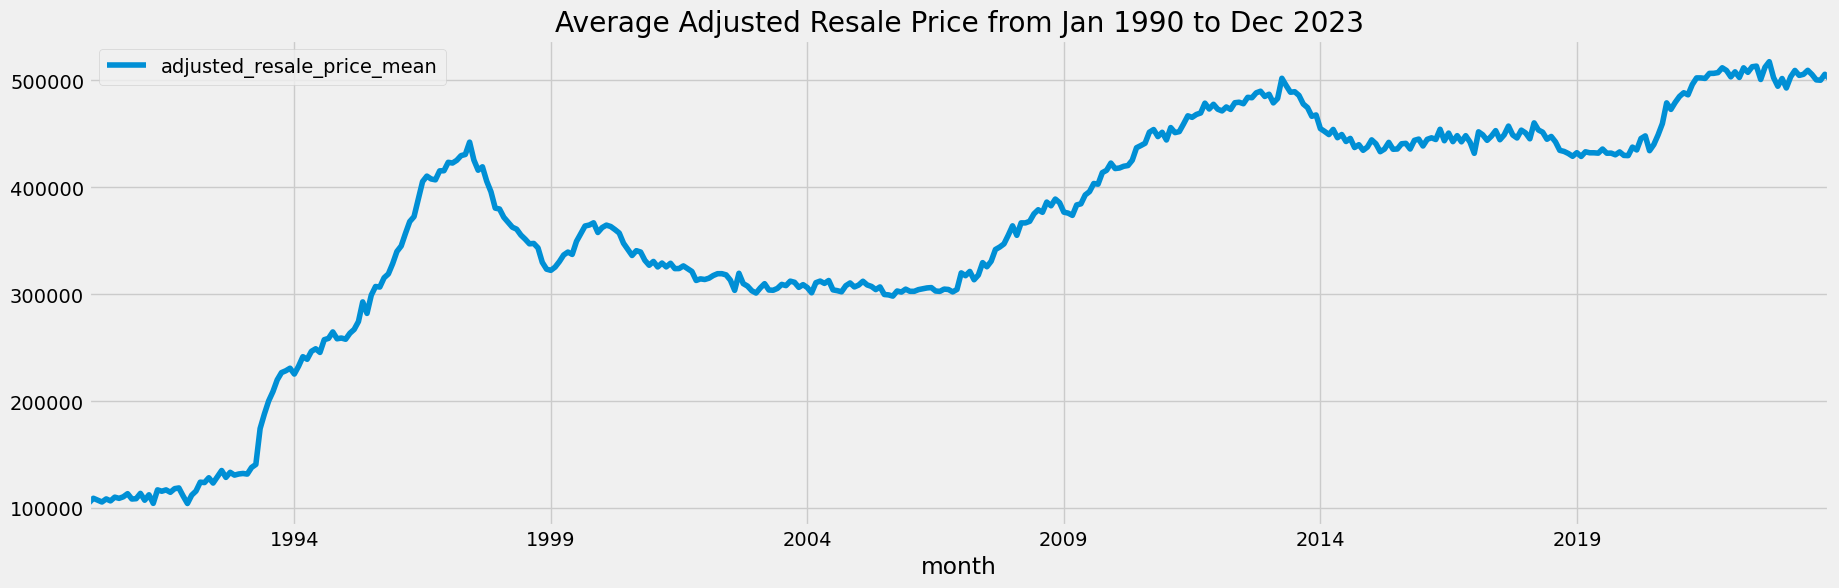

In [12]:
# Plot the data using matplotlib 
line_price_mean = adj_resale_price_mean.plot.line(figsize=(20,6))
plt.title('Average Adjusted Resale Price from Jan 1990 to Dec 2023')

In [13]:
# Export 'line_price_mean'
line_price_mean.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_mean.png'), bbox_inches='tight')

# 04. Decomposition

In [14]:
# 1. Decompose the time series using an additive model (because the time series behaves in a linear way)
decomposition = sm.tsa.seasonal_decompose(adj_resale_price_mean, model = 'additive')

In [15]:
# 2. Define a fixed size for all special charts
matplotlib.rcParams['figure.figsize'] = 20, 8

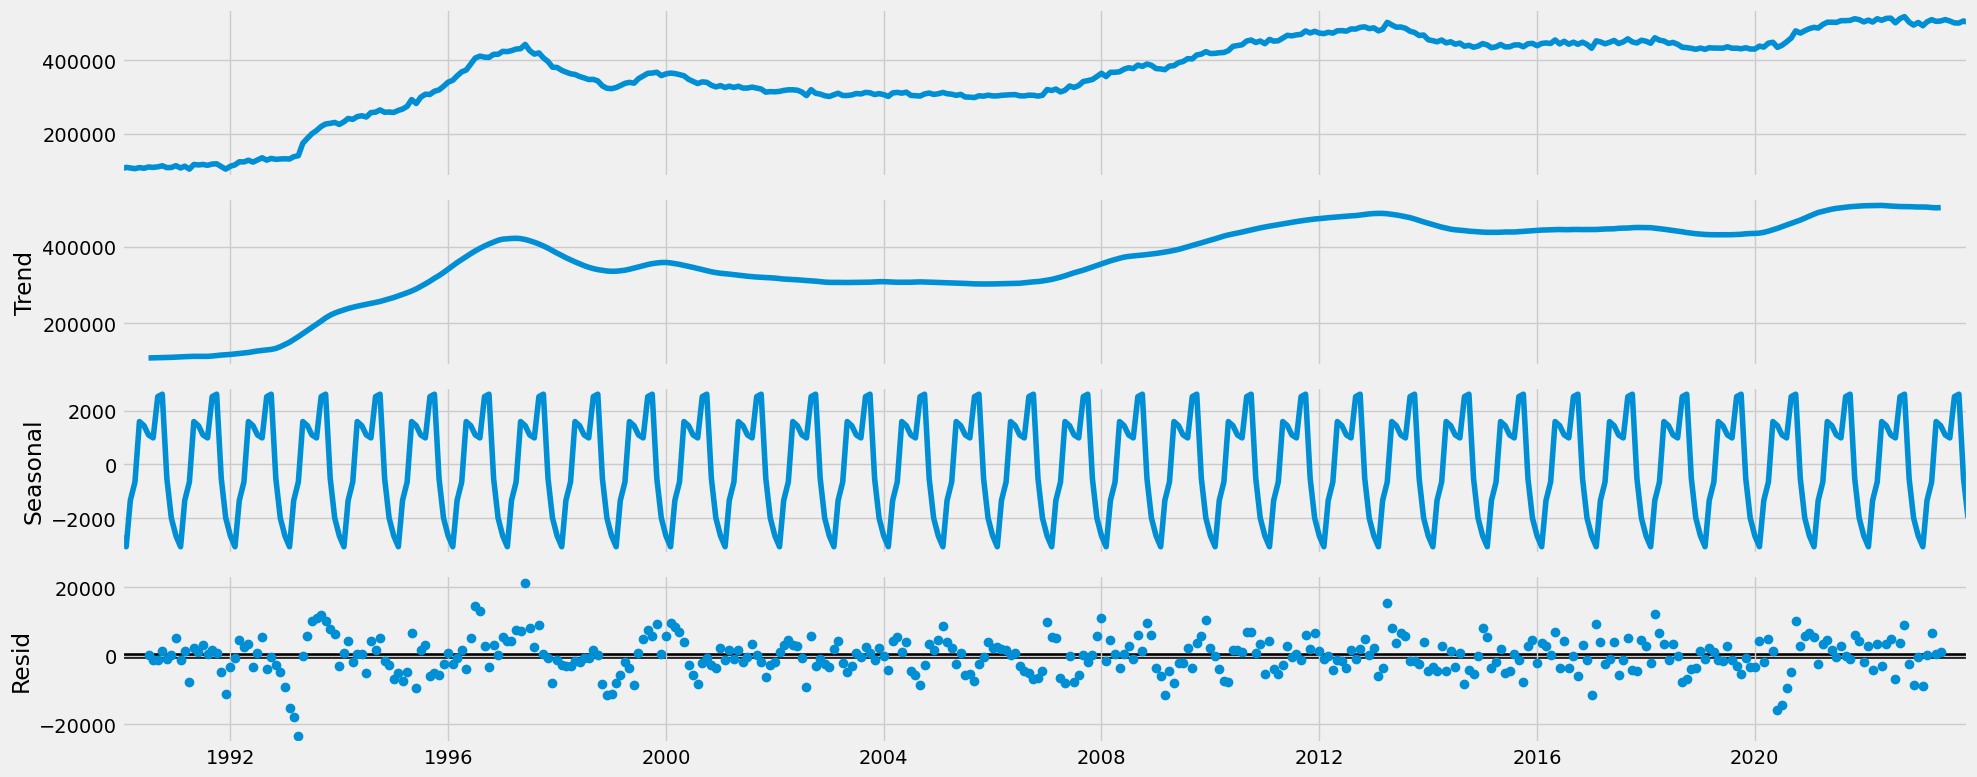

In [16]:
# 3. Plot the separate components
decomposition_price_mean = decomposition.plot()
plt.show()

In [17]:
# Export 'decomposition_price_mean'
decomposition_price_mean.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'decomposition_price_mean.png'), 
                                        bbox_inches='tight')

<b>Interpretation: </b><br>
From the trend, it generally shows an upward trend from Jan 1990 to Dec 2023. However, there are two major drops observed in the price mean, which happened in 1997 and 2013. During the Asian Financial Crisis in 1997, after the collapse of the thai Baht in July, the housing prices in Singapore continue to fall and only started gradually increasing again around 2004. In 2013, the resale price experienced a decline due to 'Propery Market Cooling Measures', such as the Additional Buyer's Stamp Duty (ABSD), Loan-to-Value (LTV) Ratio, and Total Debt Servicing Ratio (TDSR). Refer below for more information.<br>
https://www.srx.com.sg/cooling-measures

# 05. Stationarity Test

The <b>Augmented Dickey-Fuller test</b> is set up just like a statistical hypothesis test. <br>
Null hypothesis: The time series has a unit root (non-stationary). <br>
Alternative hypothesis: The time series does not have a unit root (stationary). <br>
We are going to disprove the null hypothesis, so that the data is stationary and can be forecasted.

In [18]:
# The adfuller() function will import the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

# Import the adfuller() function - Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller 
# In practice, the ADF test is commonly used over the DF test because it provides a more comprehensive assessment of 
# stationarity by accounting for potential autocorrelations in the data.

# Define the function
def aug_dickey_fuller(timeseries): 
    
    # Perform the Augmented Dickey-Fuller test:
    print ('Augmented Dickey-Fuller Stationarity test:')
    
    test = adfuller(timeseries, autolag = 'AIC')   # This will return an array of numbers
    
    # Here we label the first 4 numbers from the test result
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    
    # Here we label the 5th item (key-value pair)
    for key,value in test[4].items():
        result['Critical Value ({})'.format(key)] = value
    
    print (result)

In [19]:
# Apply the test using the function on the time series
aug_dickey_fuller(adj_resale_price_mean['adjusted_resale_price_mean'])

Augmented Dickey-Fuller Stationarity test:
Test Statistic                  -2.079575
p-value                          0.252806
Number of Lags Used              4.000000
Number of Observations Used    403.000000
Critical Value (1%)             -3.446681
Critical Value (5%)             -2.868739
Critical Value (10%)            -2.570605
dtype: float64


<b>Interpretation: </b><br>
From the result above, the test statistic is -2.079, which is larger that all the critical values at different significance levels. <br>
Also, the p-value of 0.252 is much larger than 0.01, 0.05 or 0.10 significance level. <br>
Therefore, the null hypothesis cannot be rejected and the time series data is <b>non-stationary</b>. 

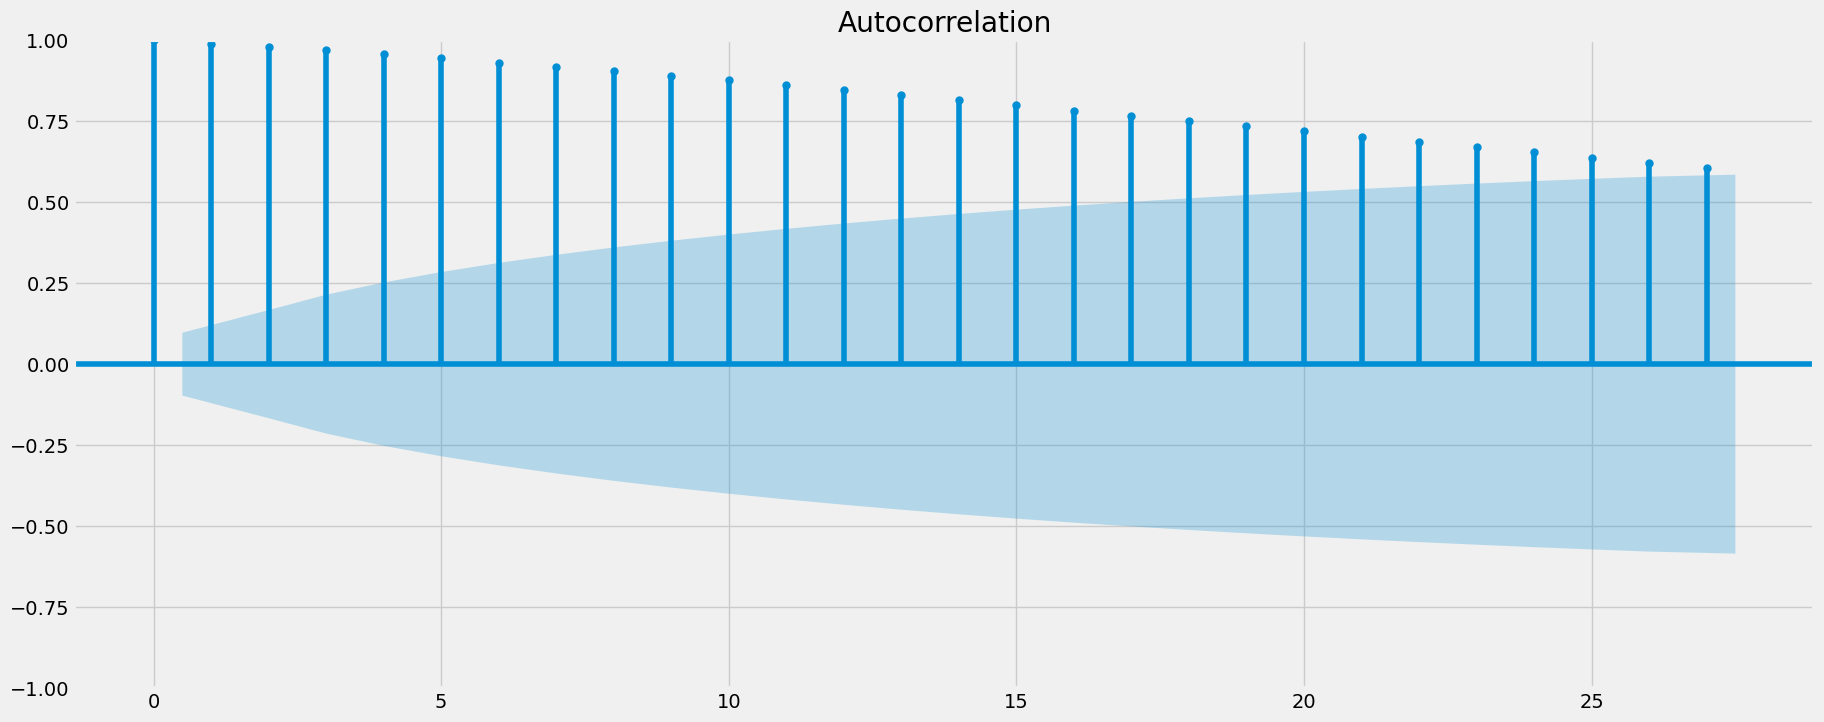

In [20]:
# Check out a plot of autocorrelations

# Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(adj_resale_price_mean)
plt.show()

<b>Interpretation: </b><br>
The vertical lines represent the lags in the series, while the blue region represents the confidence bounds (usually 95%). Values within these bounds are not significantly different from zero. If a vertical line at lag k is beyond the confidence bound, it indicates significant autocorrelation at that lag. This means the values k periods apart are correlated.

From the ACF plot above, we can see that all the vertical lines are above the confidence bounds, which means there are a lot of autocorrelated data and the data is likely non-stationary, as shown in the Dickey-Fuller test conducted. 

# 06. Stationarize Time Series Data

In [21]:
# Perform the first order differencing
adj_resale_price_mean_diff = adj_resale_price_mean.diff(axis = 0, periods = 1)

In [22]:
adj_resale_price_mean_diff

,adjusted_resale_price_mean
month,
1990-01-01,NaN
1990-02-01,4109.094680
1990-03-01,-1694.721159
1990-04-01,-1771.548720
1990-05-01,2886.456453
1990-06-01,-1850.046040
1990-07-01,3496.536182
1990-08-01,-1114.049956
1990-09-01,1436.952248


In [23]:
# Drop the missing value that came about as a result of the differencing
# Else we won't be able to run the Dickey-Fuller test 
adj_resale_price_mean_diff.dropna(inplace = True)

In [24]:
adj_resale_price_mean_diff

,adjusted_resale_price_mean
month,
1990-02-01,4109.094680
1990-03-01,-1694.721159
1990-04-01,-1771.548720
1990-05-01,2886.456453
1990-06-01,-1850.046040
1990-07-01,3496.536182
1990-08-01,-1114.049956
1990-09-01,1436.952248
1990-10-01,2928.749595


In [25]:
adj_resale_price_mean_diff.shape

(407, 1)

Text(0.5, 1.0, 'Average Adjusted Resale Price from Jan 1990 to Dec 2023 (after 1st Order Differencing)')

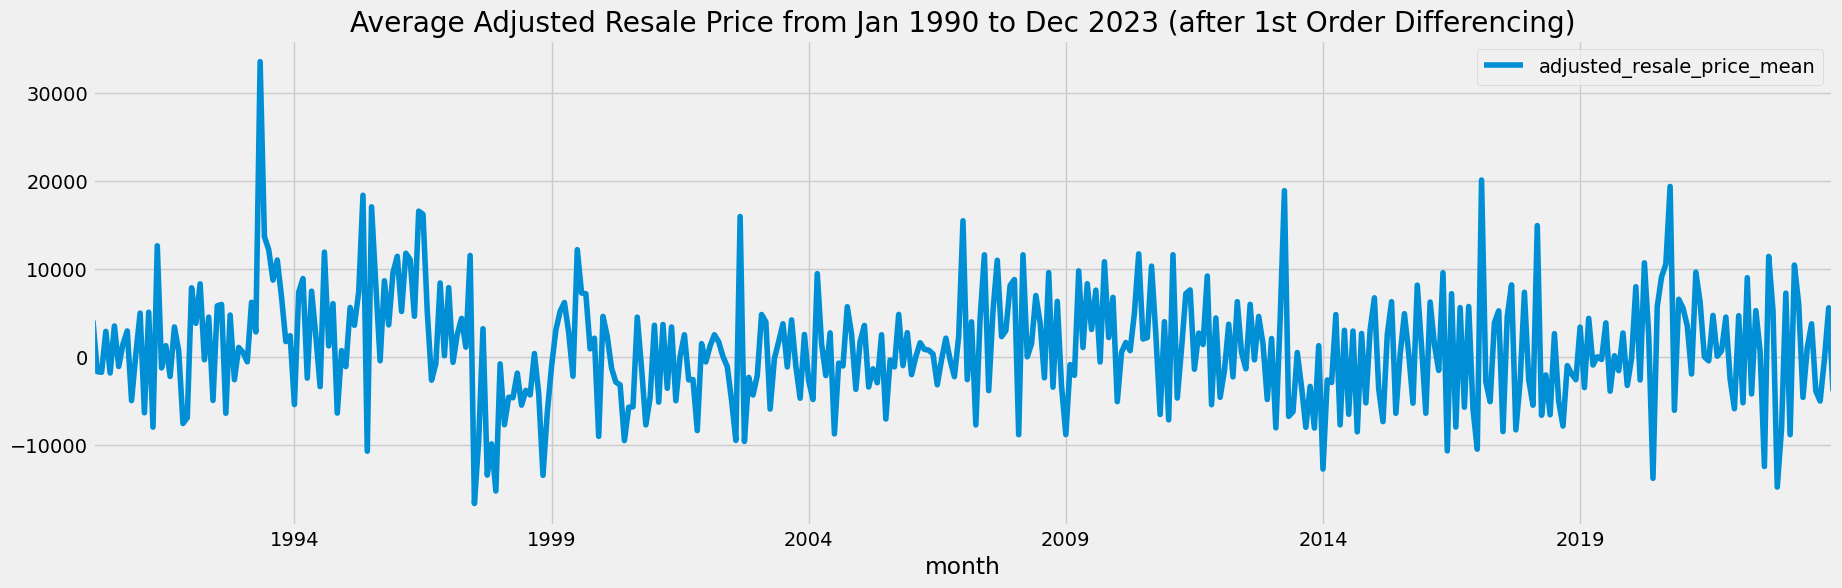

In [26]:
adj_resale_price_mean_diff.plot.line(figsize = (20, 6))
plt.title('Average Adjusted Resale Price from Jan 1990 to Dec 2023 (after 1st Order Differencing)')

This new dataframe has decidedly less of a upward slope. Also, the values on the y-axis have changed greatly. By stationarizing data, we’re effectively getting rid of the data’s trend. Now it has a much more horizontal line. 

In [27]:
# Perform stationarity test after differencing
aug_dickey_fuller(adj_resale_price_mean_diff)

Augmented Dickey-Fuller Stationarity test:
Test Statistic                -6.657528e+00
p-value                        4.940917e-09
Number of Lags Used            3.000000e+00
Number of Observations Used    4.030000e+02
Critical Value (1%)           -3.446681e+00
Critical Value (5%)           -2.868739e+00
Critical Value (10%)          -2.570605e+00
dtype: float64


<b>Interpretation: </b><br>
The test statistic is now -6.657, which is greatly smaller than all the critical values at different significance levels. <br>
Also, the p-value is now almost zero, which is much smaller than either 0.01, 0.05 or 0.10 significance level. <br>
Therefore, the null hypothesis could be rejected and time series data is <b>stationary</b>. 

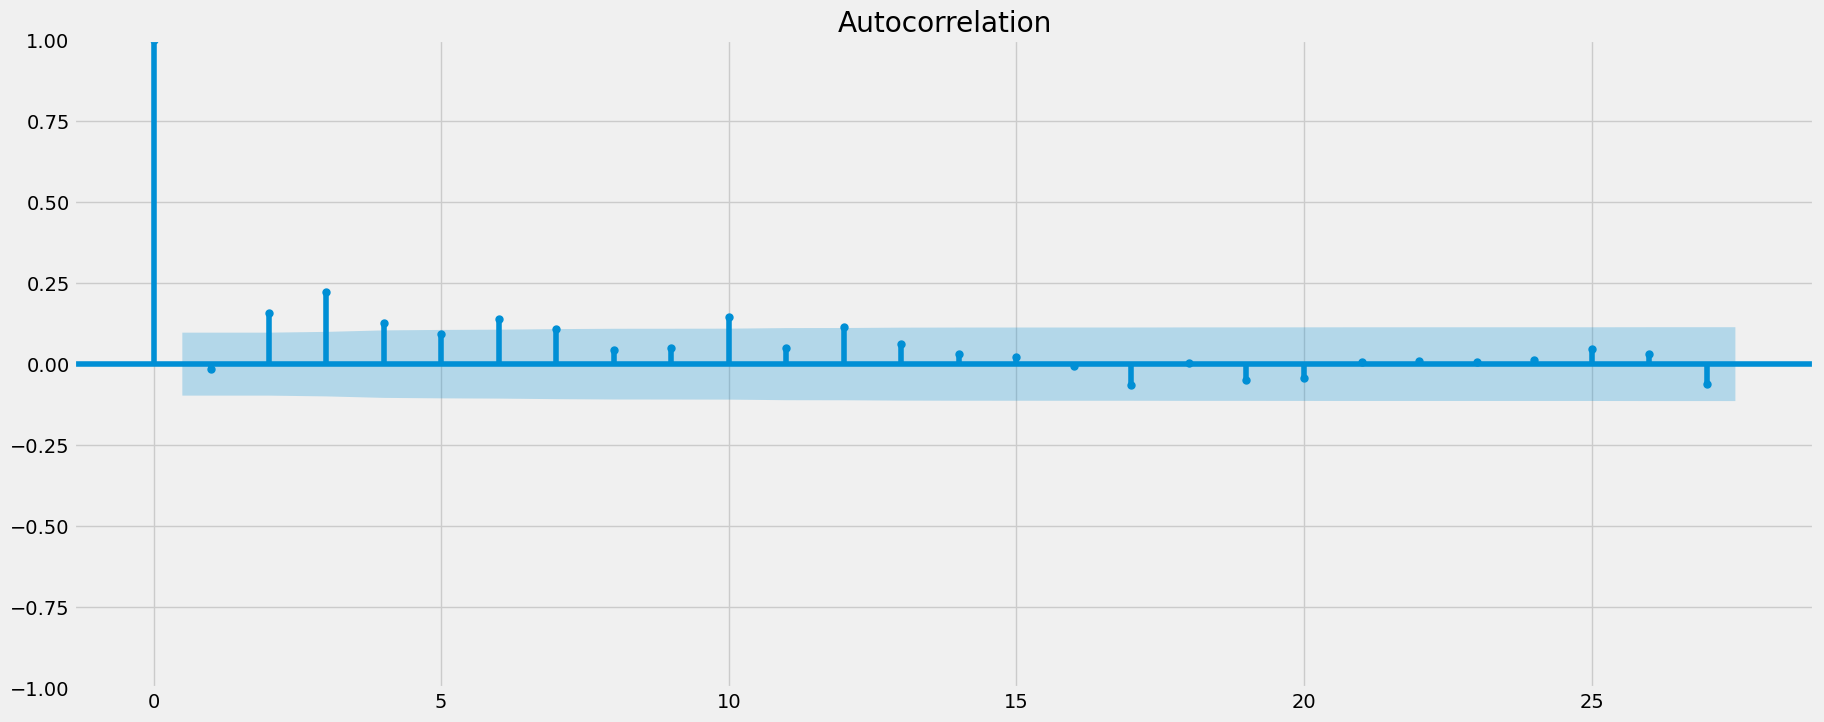

In [28]:
# Check out a plot of autocorrelations

plot_acf(adj_resale_price_mean_diff)
plt.show()

After differencing, the autocorrelation plot has greatly improved. There are much fewer autocorrelated terms. This could suggest the data is stationary, as shown in the Augmented Dickey-Fuller test. 

# 07. Training ARIMA Model

### 07.1 Defining Parameters

<b>1. Parameter d</b><br>
Previously we have differenced once, and the time series data becomes stationary as shown in Augmented Dickey-Fuller Test results and autocorrelations plot. This means that <b>d = 1</b>.

<b>2. Parameter p</b><br>
Parameter p is responsible for the autoregressive (AR) part of the model. It is determined by taking a look at a plot of partial autocorrelations (PACF). 

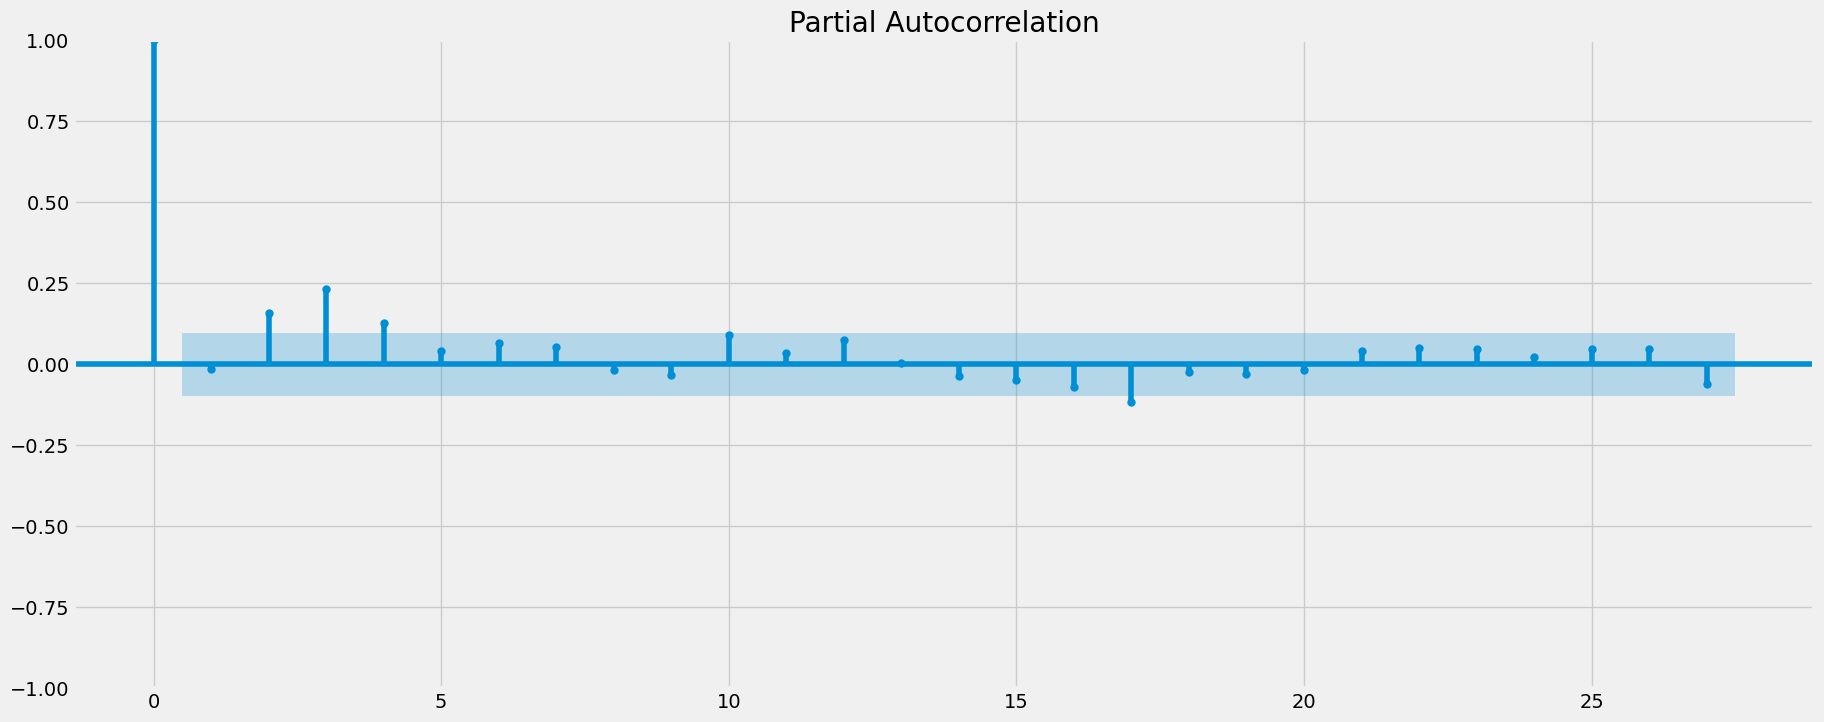

In [29]:
# PACF plot
plot_pacf(adj_resale_price_mean_diff)
plt.show()

From the PACF plot, we can see some lines beyond the confidence region (blue region). These indicate significant correlations. Since there is a significant spike at lag = 3, let’s start by picking 3 AR terms to compensate for the highest of the partial autocorrelations. This makes <b>p = 3</b>.

<b>3. Parameter q</b><br>
Parameter q is responsible for the moving average (MA) part of the model. It is determined by taking a look at a plot of autocorrelations (ACF).

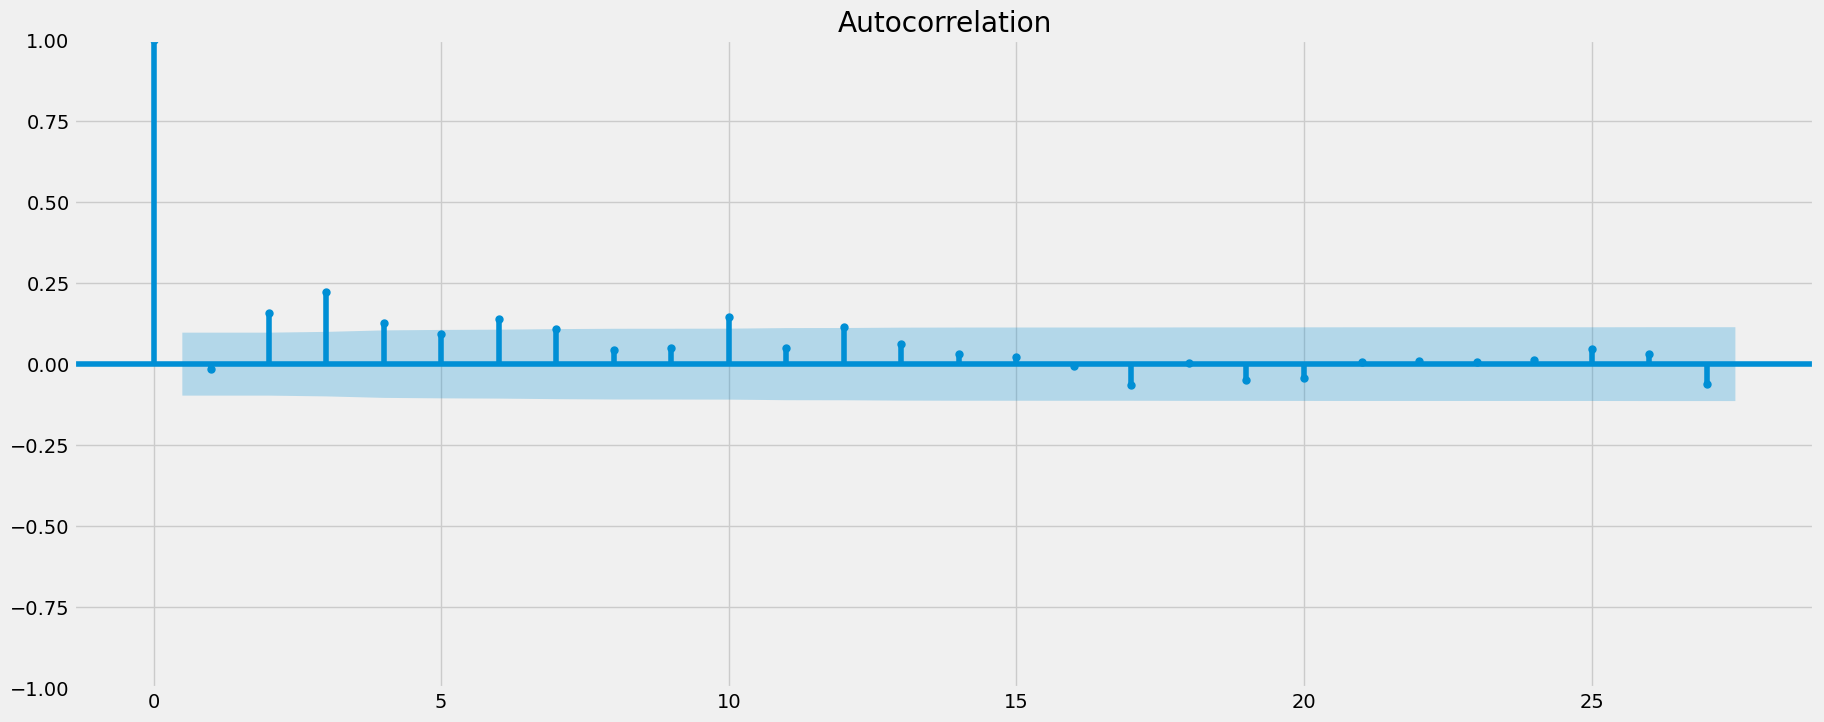

In [30]:
# ACF plot
plot_acf(adj_resale_price_mean_diff)
plt.show()

From the ACF plot, we can see some lines beyond the confidence region (blue region). These indicate significant correlations. Since there is a spike at lag =3, let’s start by picking 3 MA terms to compensate for the highest of the autocorrelations. This makes <b>q = 3</b>.

To recap: p = 3, d = 1, q = 3

### 07.2 Spliting the Data

Split the data into training set and test set in a 70/30 ratio. (12/2013 as a cut off)

In [31]:
adj_resale_price_mean.shape

(408, 1)

In [32]:
# Training set
train = adj_resale_price_mean.iloc[:288]

In [33]:
train.shape

(288, 1)

In [34]:
train.head(3)

,adjusted_resale_price_mean
month,
1990-01-01,105184.065758
1990-02-01,109293.160437
1990-03-01,107598.439278


In [35]:
train.tail(3)

,adjusted_resale_price_mean
month,
2013-10-01,474553.380680
2013-11-01,466442.827241
2013-12-01,467699.881831


In [36]:
# Testing set
test = adj_resale_price_mean.iloc[288:]

In [37]:
test.shape

(120, 1)

In [38]:
test.head(3)

,adjusted_resale_price_mean
month,
2014-01-01,454926.329278
2014-02-01,452283.141128
2014-03-01,449347.833667


In [39]:
test.tail(3)

,adjusted_resale_price_mean
month,
2023-10-01,500162.919217
2023-11-01,505724.680741
2023-12-01,501810.291244


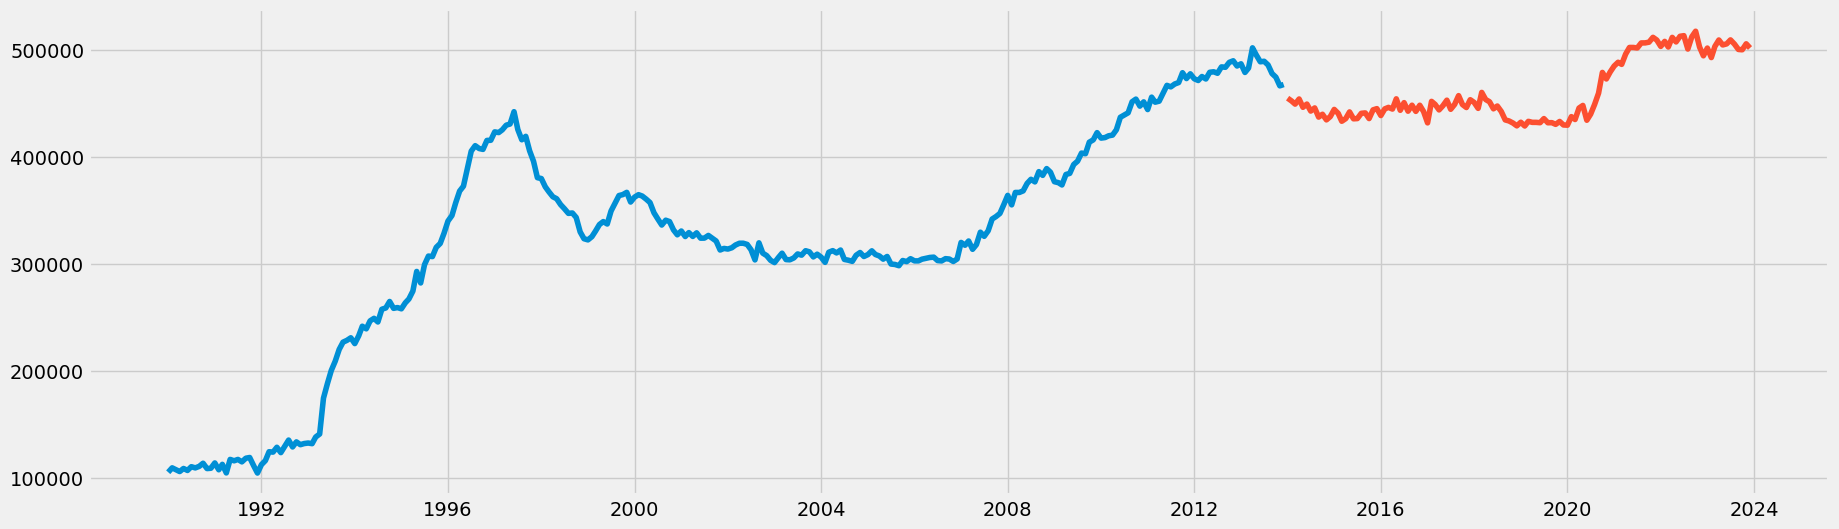

In [40]:
# Plot both sets in order to see the split

plt.figure(figsize = (20, 6), dpi = 100)
plt.plot(train)
plt.plot(test)

### 07.3 Running and Fitting the Model

In [41]:
# Import the ARIMA model
from statsmodels.tsa.api import ARIMA 
from sklearn.metrics import mean_squared_error

# Define a function for ARIMA model
def arima(p, d, q):
    
    # 1. Train an ARIMA model
    model = ARIMA(train, order = (p, d, q))
    fitted = model.fit()
    
    # 2. Check model summary
    print(fitted.summary()) 

    # 3. Forecast 
    # .get_forecast() will return an array of forecasted values and also the confidence intervals.
    result = fitted.get_forecast(120, alpha = 0.05)  # 95% confidence interval --> alpha = 0.05 
                                                     # 120 is the shape of the test set

    # 4. Extract the forecasted values and confidence intervals from the result (convert into panda series if needed)
    # 4.1 The forecasted curve
    forecast = result.predicted_mean   # it is already a panda series 

    # 4.2 The lower bound of confidence interval
    # Access the confidence intervals first
    conf = result.conf_int()
    lower_bound = conf.iloc[:, 0]   # it is already a panda series

    # 4.3 The upper bound of confidence interval
    upper_bound = conf.iloc[:, 1]   # it is already a panda series

    # 5. Plot
    plt.figure(figsize = (20, 6), dpi = 100)
    plt.plot(train, label = 'training')
    plt.plot(test, label = 'actual')
    plt.plot(forecast, label = 'forecast')
    plt.fill_between(lower_bound.index, lower_bound, upper_bound, 
                     color = 'k', alpha = 0.05) # This creates the confidence interval
    plt.title(f'Average Adjusted Resale Price from Jan 1990 to Dec 2023 - ARIMA({p}, {d}, {q})')
    plt.legend(loc = 'upper left')
    plt.show()

    # 6. Calculate RMSE between actual test values and forecasted values
    mse = mean_squared_error(test, forecast) 
    print(f'Root mean squared error between the actual test values and forecasted values: \033[1m{np.sqrt(mse)}\033[0m')

#### Iteration 1

                                   SARIMAX Results                                    
Dep. Variable:     adjusted_resale_price_mean   No. Observations:                  288
Model:                         ARIMA(3, 1, 3)   Log Likelihood               -2914.553
Date:                        Thu, 25 Jul 2024   AIC                           5843.105
Time:                                16:56:21   BIC                           5868.721
Sample:                            01-01-1990   HQIC                          5853.372
                                 - 12-01-2013                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1716      3.462      0.050      0.960      -6.614       6.957
ar.L2          0.4143      2.781      0.149      0.882      -5.036 

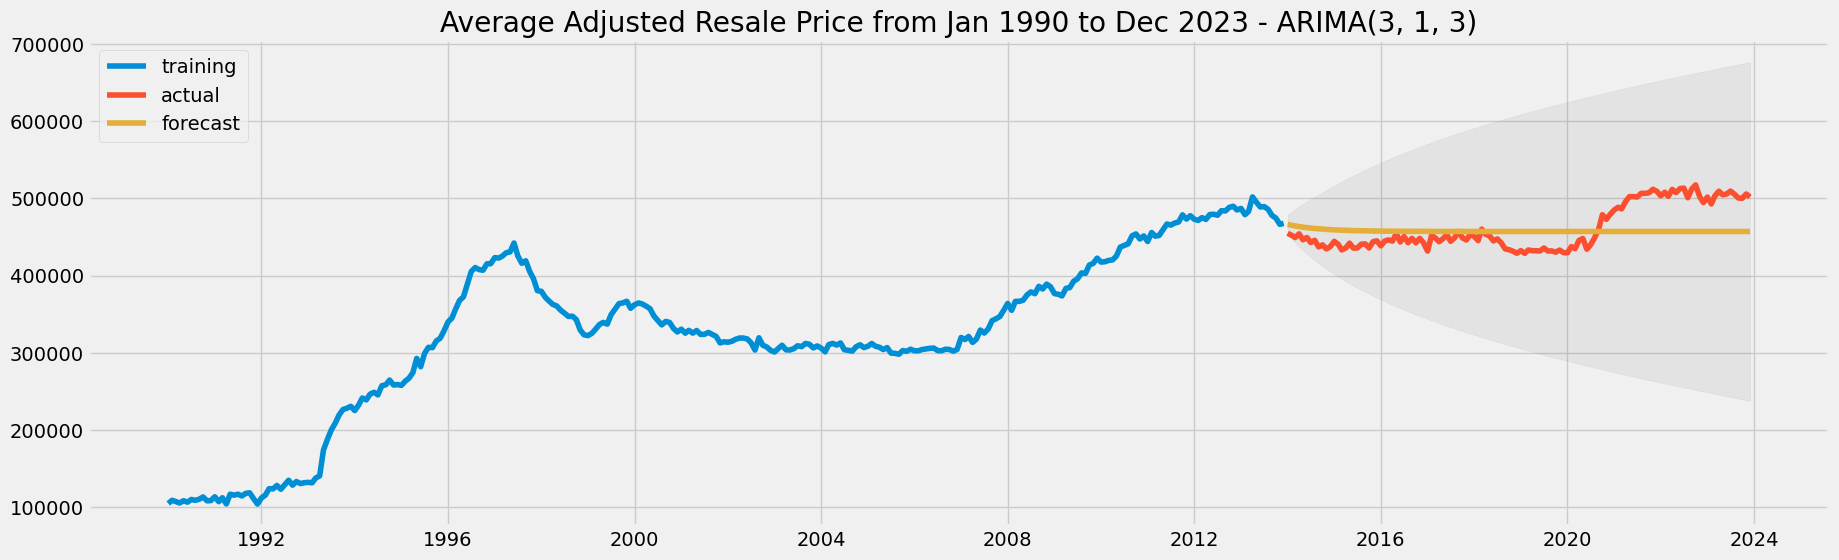

Root mean squared error between the actual test values and forecasted values: 29717.20628601378


In [42]:
# arima(p, d, q)
arima(3, 1, 3)

<b>ARIMA(3, 1, 3):</b><br>
- From the result summary, all the AR and MA terms are not statistically significant (p>0.05). This is not good.
- AIC is 5843. 
- From the time series plot, the actual curve is within the 5% confidence interval. 
- The RMSE between actual and forecasted values is \$29,717. 

Note: 
- The significance of all terms is crucial to ensures that each parameter contributes meaningfully to the model.
- A lower AIC suggests a better fit of the model to the data.
- A lower RMSE indicates better predictive accuracy.

<b>Next iteration:</b><br>
- Since all the AR and MA terms are not statistically significant, try to reduce the AR and MA terms. 
- p = 2, d = 1, q = 2

#### Iteration 2

                                   SARIMAX Results                                    
Dep. Variable:     adjusted_resale_price_mean   No. Observations:                  288
Model:                         ARIMA(2, 1, 2)   Log Likelihood               -2914.593
Date:                        Thu, 25 Jul 2024   AIC                           5839.186
Time:                                16:56:25   BIC                           5857.484
Sample:                            01-01-1990   HQIC                          5846.520
                                 - 12-01-2013                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7514      0.513      1.465      0.143      -0.254       1.756
ar.L2          0.1147      0.477      0.241      0.810      -0.819 

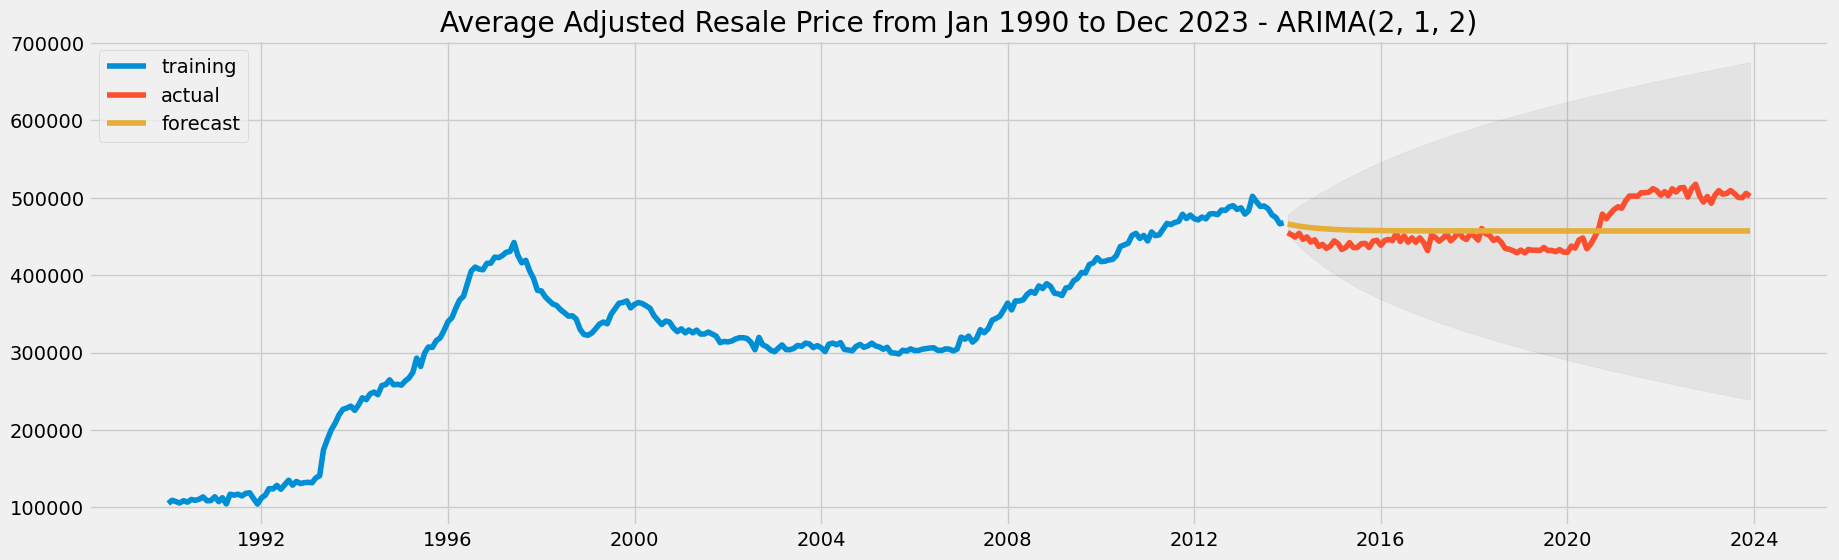

Root mean squared error between the actual test values and forecasted values: 29699.747414089143


In [43]:
# arima(p, d, q)
arima(2, 1, 2)

<b>ARIMA(2, 1, 2):</b><br>
- From the result summary, all the AR and MA terms are still not statistically significant (p>0.05). This is not good. 
- AIC is 5839, which is lower than ARIMA(3, 1, 3). 
- From the time series plot, the actual curve is within the 5% confidence interval. 
- The RMSE between actual values and forecasted values is \$29,700, which is lower than ARIMA(3, 1, 3). 

Note: 
- The significance of all terms is crucial to ensures that each parameter contributes meaningfully to the model.
- A lower AIC suggests a better fit of the model to the data.
- A lower RMSE indicates better predictive accuracy.

<b>Next iteration:</b><br>
- Since all the AR and MA terms are still not statistically significant, try to further reduce the AR and MA terms. 
- p = 1, d = 1, q = 1

#### Iteration 3

                                   SARIMAX Results                                    
Dep. Variable:     adjusted_resale_price_mean   No. Observations:                  288
Model:                         ARIMA(1, 1, 1)   Log Likelihood               -2915.393
Date:                        Thu, 25 Jul 2024   AIC                           5836.786
Time:                                16:56:29   BIC                           5847.764
Sample:                            01-01-1990   HQIC                          5841.186
                                 - 12-01-2013                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9158      0.047     19.537      0.000       0.824       1.008
ma.L1         -0.8508      0.063    -13.409      0.000      -0.975 

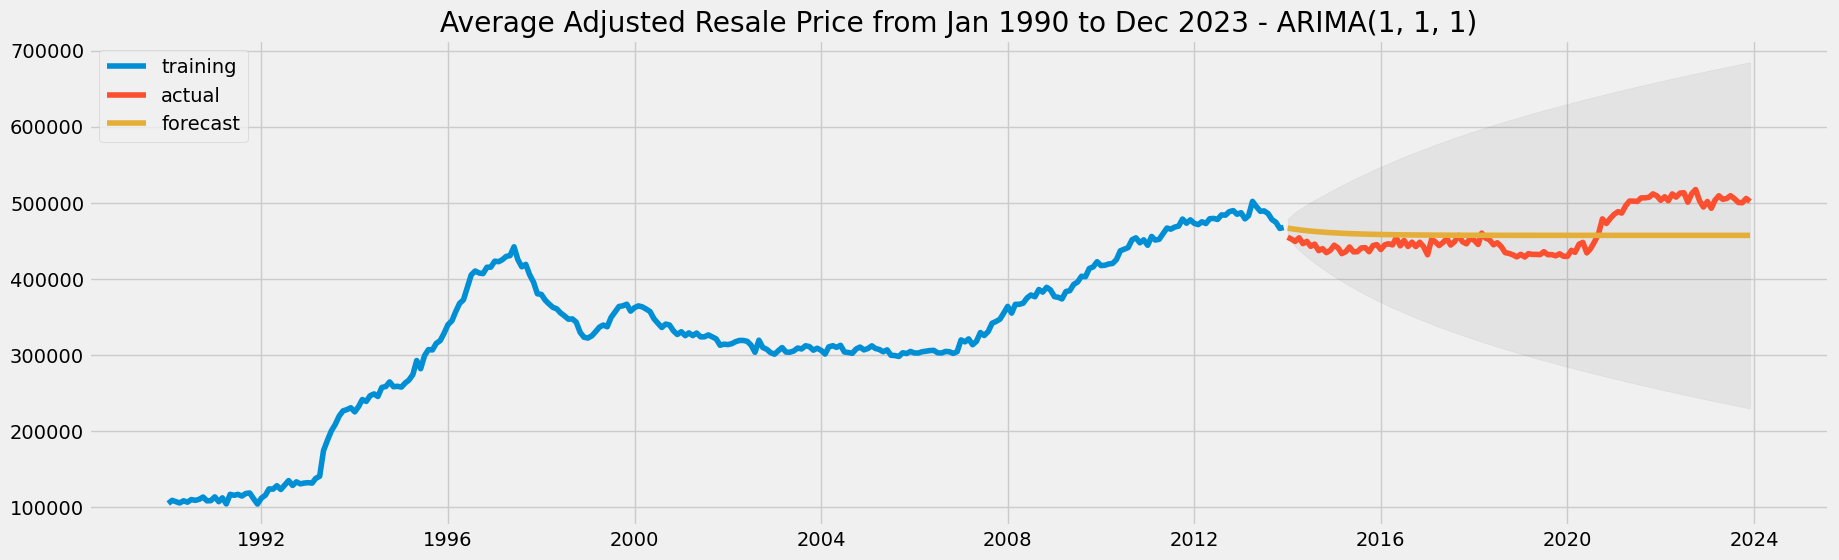

Root mean squared error between the actual test values and forecasted values: 29863.99463418663


In [44]:
# arima(p, d, q)
arima(1, 1, 1)

<b>ARIMA(1, 1, 1):</b><br>
- From the result summary, the AR and MA terms are now statistically significant (p<0.05). This is good. 
- AIC is 5836, which is lower than ARIMA(2, 1, 2). 
- From the time series plot, the actual curve is within the 5% confidence interval. 
- The RMSE between actual values and forecasted values is \$29,864, which is higher than ARIMA(2, 1, 2) and ARIMA(3, 1, 3). 

Note: <br>
- The significance of all terms is crucial to ensures that each parameter contributes meaningfully to the model.
- A lower AIC suggests a better fit of the model to the data.
- A lower RMSE indicates better predictive accuracy.

<b>Next iteration:</b><br>
- Try with ARIMA(1, 1, 2) and ARIMA(2, 1, 1) - The result will be written in summary below.

### Summary: 

ARIMA(1, 1, 1) : <b>AIC</b> = 5836; <b>RMSE</b> = \\$29,864; <b>Significance</b>: All AR/MA terms are significant <br>
ARIMA(1, 1, 2) : <b>AIC</b> = 5837; <b>RMSE</b> = \\$29,666; <b>Significance</b>: 1 MA term is not significant <br>
ARIMA(2, 1, 1) : <b>AIC</b> = 5837; <b>RMSE</b> = \\$29,681; <b>Significance</b>: 1 AR term is not significant <br>
ARIMA(2, 1, 2) : <b>AIC</b> = 5839; <b>RMSE</b> = \\$29,700; <b>Significance</b>: All AR/MA terms are not significant <br>
ARIMA(3, 1, 3) : <b>AIC</b> = 5843; <b>RMSE</b> = \\$29,717; <b>Significance</b>: All AR/MA terms are not significant <br>
All models have their actual curve within confidence interval. 

Note:
- The significance of all terms is crucial to ensures that each parameter contributes meaningfully to the model.
- A lower AIC suggests a better fit of the model to the data.
- A lower RMSE indicates better predictive accuracy.

<b><u>Conclusion: </u></b><br>
ARIMA(1,1,1) is the best choice because it has all significant terms, the lowest AIC, and a slightly higher RMSE compared to ARIMA(1,1,2). 

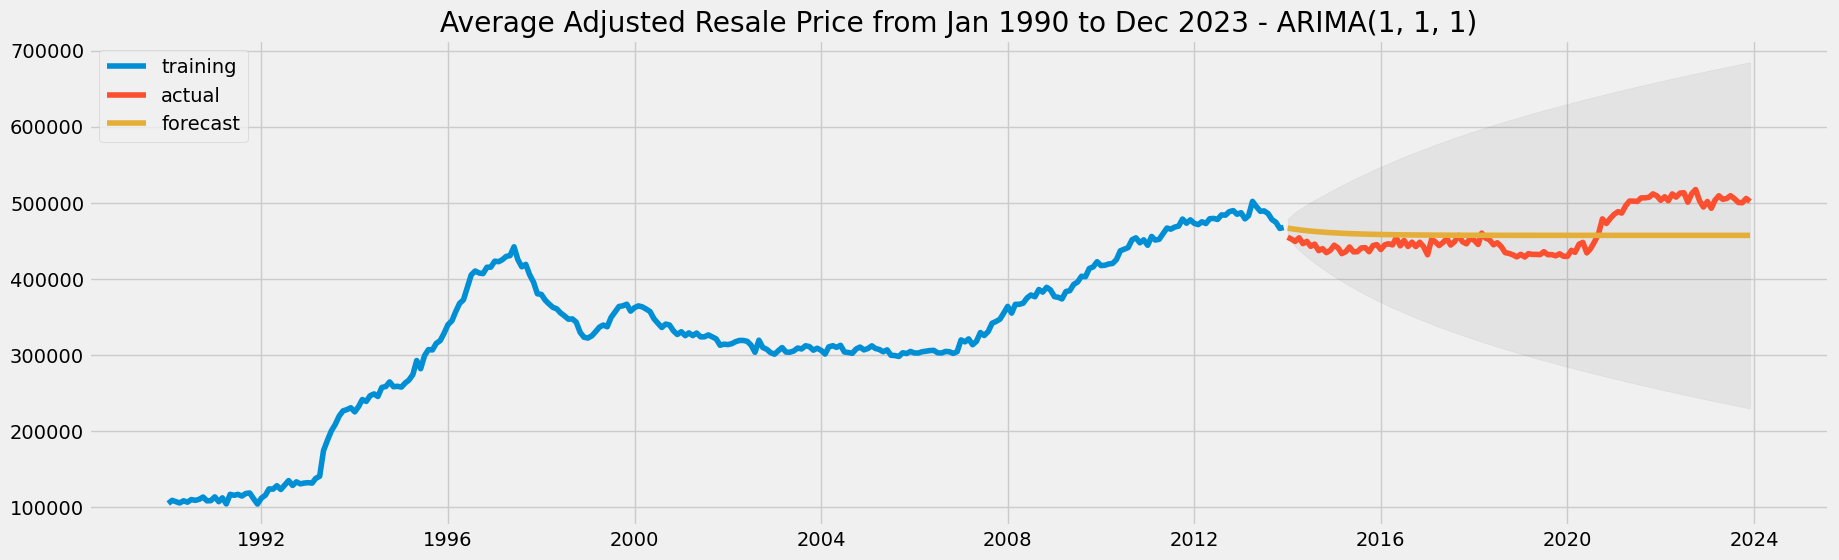

In [45]:
# Export the plot of ARIMA(1, 1, 1) with training set 

# 1. Train an ARIMA model
model = ARIMA(train, order = (1, 1, 1))
fitted = model.fit()

# 2. Forecast 
# .get_forecast() will return an array of forecasted values and also the confidence intervals.
result = fitted.get_forecast(120, alpha = 0.05)  # 95% confidence interval --> alpha = 0.05 
                                                 # 120 is the shape of the test set

# 3. Extract the forecasted values and confidence intervals from the result (convert into panda series if needed)
# 3.1 The forecasted curve
forecast = result.predicted_mean   # it is already a panda series 

# 3.2 The lower bound of confidence interval
# Access the confidence intervals first
conf = result.conf_int()
lower_bound = conf.iloc[:, 0]   # it is already a panda series

# 3.3 The upper bound of confidence interval
upper_bound = conf.iloc[:, 1]   # it is already a panda series

# 4. Plot
line_price_mean_forecast_training = plt.figure(figsize = (20, 6), dpi = 100)
plt.plot(train, label = 'training')
plt.plot(test, label = 'actual')
plt.plot(forecast, label = 'forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, 
                 color = 'k', alpha = 0.05) # This creates the confidence interval
plt.title(f'Average Adjusted Resale Price from Jan 1990 to Dec 2023 - ARIMA(1, 1, 1)')
plt.legend(loc = 'upper left')
plt.show()

# 5. Export plot
line_price_mean_forecast_training.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_mean_forecast_training.png'))

# 08. Time Series Forecast with Trained ARIMA Model

Using ARIMA(1, 1, 1), we try to forecast the average adjusted resale price for the upcoming 5 years (60 months). 

                                   SARIMAX Results                                    
Dep. Variable:     adjusted_resale_price_mean   No. Observations:                  408
Model:                         ARIMA(1, 1, 1)   Log Likelihood               -4142.364
Date:                        Thu, 25 Jul 2024   AIC                           8290.728
Time:                                16:57:10   BIC                           8302.755
Sample:                            01-01-1990   HQIC                          8295.487
                                 - 12-01-2023                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9363      0.037     25.517      0.000       0.864       1.008
ma.L1         -0.8860      0.051    -17.360      0.000      -0.986 

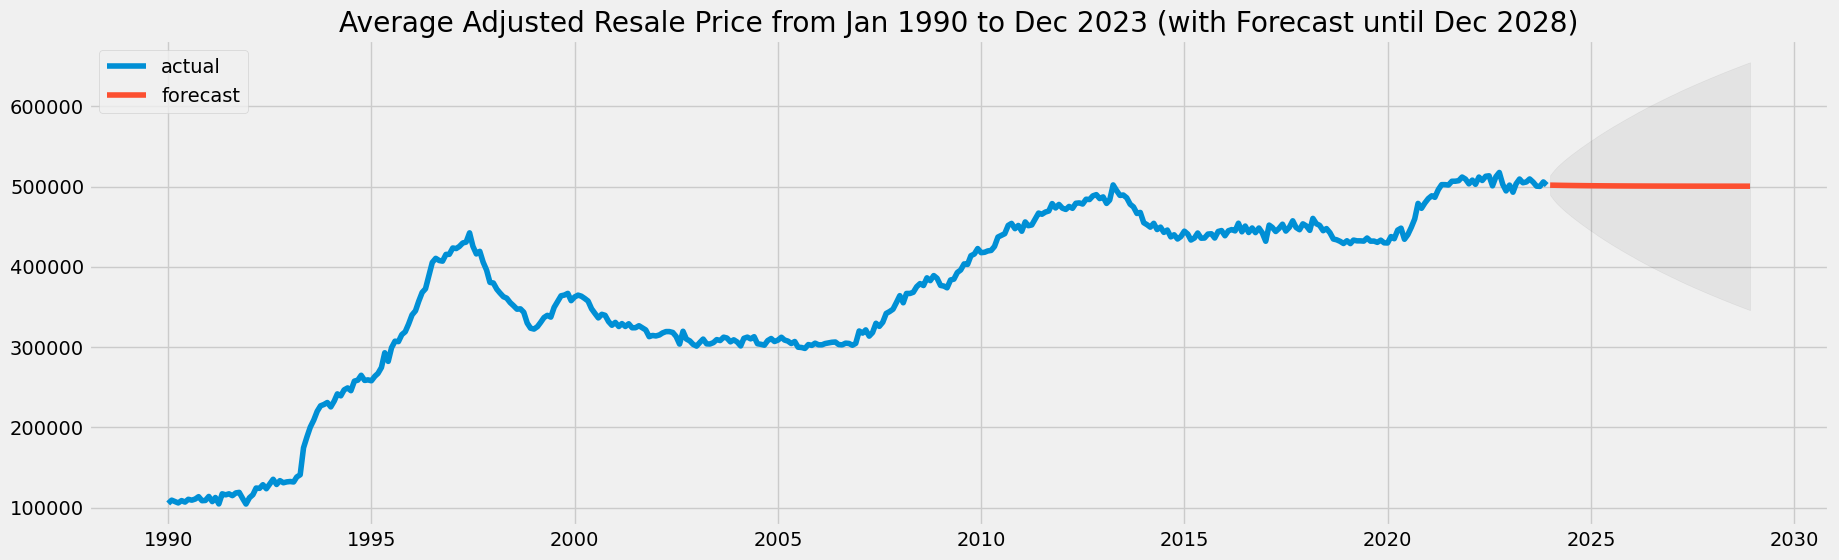

In [46]:
# 1. Fit the entire data 'adj_resale_price_mean' to ARIMA(1, 1, 1) model
model = ARIMA(adj_resale_price_mean, order = (1, 1, 1))
fitted = model.fit()

# 2. Check model summary
print(fitted.summary()) 

# 3. Forecast 
# .get_forecast() will return an array of forecasted values and also the confidence intervals.
result = fitted.get_forecast(60, alpha = 0.05)  # 95% confidence interval --> alpha = 0.05 
                                                # 60 is the number of months to be forecasted

# 4. Extract the forecasted values and confidence intervals from the result (convert into panda series if needed)
# 4.1 The forecasted curve
forecast = result.predicted_mean   # it is already a panda series 

# 4.2 The lower bound of confidence interval
# Access the confidence intervals first
conf = result.conf_int()
lower_bound = conf.iloc[:, 0]   # it is already a panda series

# 4.3 The upper bound of confidence interval
upper_bound = conf.iloc[:, 1]   # it is already a panda series

# 5. Plot
plt.figure(figsize = (20, 6), dpi = 100)
plt.plot(adj_resale_price_mean, label = 'actual')
plt.plot(forecast, label = 'forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, 
                 color = 'k', alpha = 0.05) # This creates the confidence interval
plt.title('Average Adjusted Resale Price from Jan 1990 to Dec 2023 (with Forecast until Dec 2028)')
plt.legend(loc = 'upper left')
plt.show()

<b>Interpretation:</b><br>
- From the result summary, the AR and MA terms are statistically significant (p<0.05). 
- From the time series plot, the forecasted average adjusted resale price seems to be maintained at about \\$500,000 until December 2028.

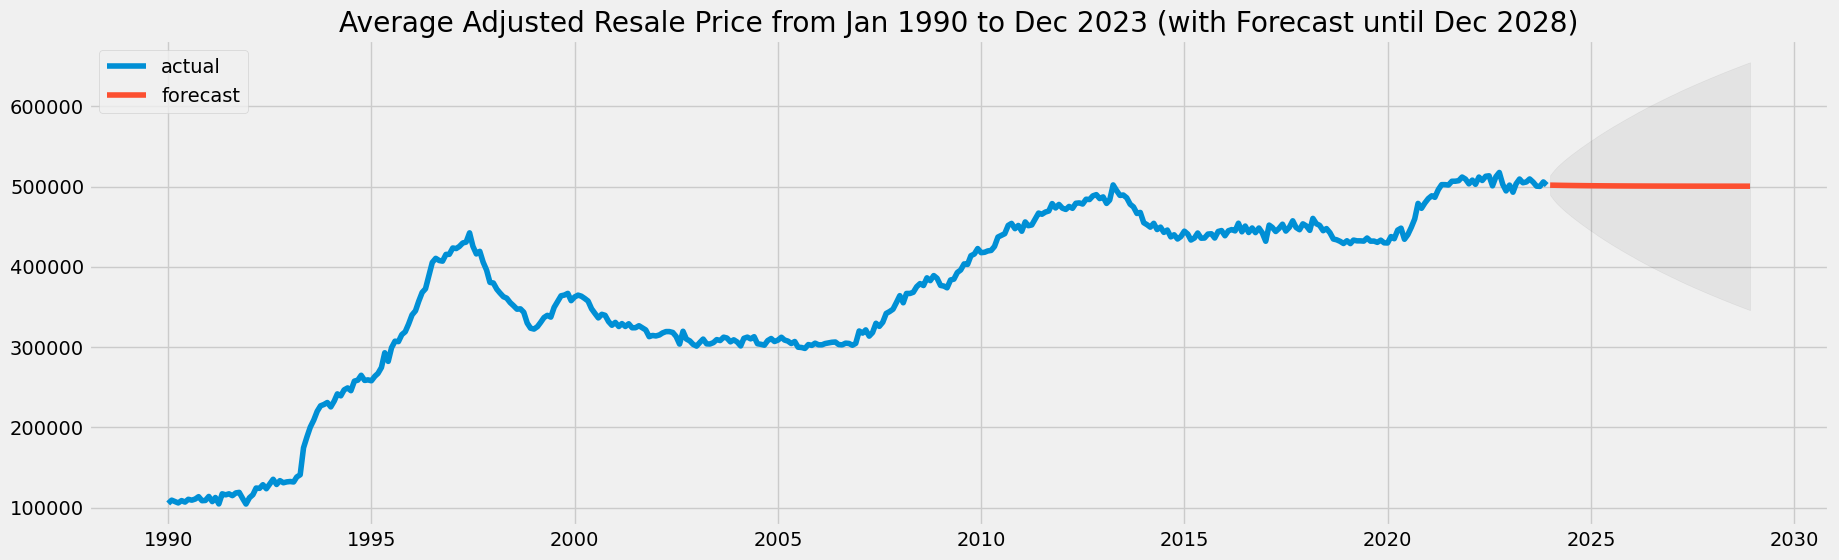

In [47]:
# Export the forecasted plot above
line_price_mean_forecast_actual = plt.figure(figsize = (20, 6), dpi = 100)
plt.plot(adj_resale_price_mean, label = 'actual')
plt.plot(forecast, label = 'forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, 
                 color = 'k', alpha = 0.05) # This creates the confidence interval
plt.title('Average Adjusted Resale Price from Jan 1990 to Dec 2023 (with Forecast until Dec 2028)')
plt.legend(loc = 'upper left')
plt.show()

line_price_mean_forecast_actual.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_mean_forecast_actual.png'))

# 09. Takeaway

- The average adjusted resale price is not stationary, 1st order differencing is done to make it stationary. Thus, d = 1. 
- From the ACF plot, there is a significant spike at lag = 3. Thus, q = 3 to kick start the model training. 
- From the PACF plot, there is a significant spike at lag = 3. Thus, p = 3 to kick start the model training. 
- Train and test sets are established to train the ARIMA model. The cutoff date of the train/test data is Dec 2013. 
- After a few iteration, ARIMA(1, 1, 1) is chosen as its AR/MA terms are all significant, and it has the lowest AIC value. 
- Using ARIMA(1, 1, 1), the average adjusted resale price for the upcoming 5 years (Jan 2024 to Dec 2028) is forecasted to be maintained at about \$500,000.  

# 10. Export Data

In [48]:
adj_resale_price_mean

,adjusted_resale_price_mean
month,
1990-01-01,105184.065758
1990-02-01,109293.160437
1990-03-01,107598.439278
1990-04-01,105826.890558
1990-05-01,108713.347011
1990-06-01,106863.300971
1990-07-01,110359.837153
1990-08-01,109245.787197
1990-09-01,110682.739445


In [49]:
adj_resale_price_mean.shape

(408, 1)

In [50]:
adj_resale_price_mean.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'adj_resale_price_mean.csv'))

In [51]:
forecast

2024-01-01    501718.847324
2024-02-01    501633.229756
2024-03-01    501553.067314
2024-04-01    501478.012423
2024-05-01    501407.739656
2024-06-01    501341.944320
2024-07-01    501280.341135
2024-08-01    501222.662999
2024-09-01    501168.659826
2024-10-01    501118.097466
2024-11-01    501070.756689
2024-12-01    501026.432230
2025-01-01    500984.931905
2025-02-01    500946.075774
2025-03-01    500909.695362
2025-04-01    500875.632929
2025-05-01    500843.740785
2025-06-01    500813.880649
2025-07-01    500785.923053
2025-08-01    500759.746775
2025-09-01    500735.238320
2025-10-01    500712.291421
2025-11-01    500690.806585
2025-12-01    500670.690655
2026-01-01    500651.856412
2026-02-01    500634.222193
2026-03-01    500617.711539
2026-04-01    500602.252862
2026-05-01    500587.779135
2026-06-01    500574.227601
2026-07-01    500561.539504
2026-08-01    500549.659829
2026-09-01    500538.537068
2026-10-01    500528.122994
2026-11-01    500518.372453
2026-12-01    500509

In [52]:
forecast.shape

(60,)

In [53]:
forecast.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'forecast.csv'))